목 차

01. STANDARD SQL

02. 집합 연산자

03. 계층형 질의

01. STANDARD SQL

관계형 대수

관계형 데이터베이스에서
원하는 정보를 유도하기 위한 기본 연산 집합

일반 집합 연산              순수 관계 연산


- 비관계형(No SQL)
    - MongoDB 등..

일반 집합 연산

합집합 
- 두 개의 테이블에 대해서 모든 데이터

교집합  
- 두 개의 테이블에서 공통된 데이터

차집합  
- 두 개의 테이블에서 특정 테이블의 데이터

카디션 프로덕트
- 두 개의 테이블에서 가능한 모든 경우의 수를 추출해 내는 연산

일반 집합 연산 별 SQL

A릴레이션 
- A    B    C
  A1   B1   1
  A2   B2   2
  A3   B3   3

B릴레이션
- A    B    C
  A1   B1   1
  A4   B4   4

C릴레이션
- D
  3
  4
  
합집합 (UNION)
  A ∪ B
- A    B    C
  A1   B1   1
  A2   B2   2
  A3   B3   3
  A4   B4   4
  
교집합 (INTERSECT)
  A ∩ B
- A    B    C
  A1   B1   1

차집합 (EXCEPT)
  A - B
- A    B    C
  A2   B2   2
  A3   B3   3

카티션 곱 (CROSS JOIN)
  B X C
- A    B    C   D
  A1   B1   1   3
  A1   B1   2   4
  A4   B4   3   3
  A4   B4   4   4


순수 관계 연산

셀렉션
□□□□□□□□□
■■■■■■■■■
□□□□□□□□□
■■■■■■■■■
■■■■■■■■■


프로젝션
□■■□□
□■■□□
□■■□□
□■■□□
□■■□□

조인
A1B2   B1C1    A1B1C1
A2B2   B2C2 -> A2B2C2
A3B3   B3C3    A3B3C3

디비전
AX   X  ->  A
AY   Z  
AZ
BX
CY

순수 관계 연산 별 SQL

A릴레이션 
- A    B    C
  A1   B1   1
  A2   B2   2
  A3   B3   3

B릴레이션
- A    B    C
  A1   B1   1
  A4   B4   4

C릴레이션
- A    D
  A1   3
  A4   4
  
D릴레이션
- A
  A4

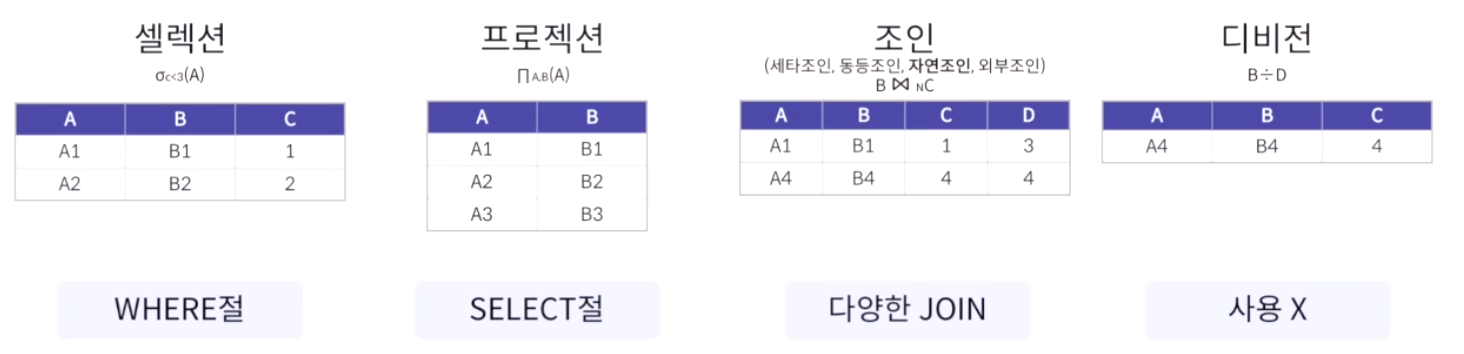

    시그마             파이             조인               

STANDARD SQL - 순수 관계 연산
student 테이블에는 여러 학생의 정보가 담겨있습니다.

해당 테이블의 정보를 이용하여 3학년인 학생의 데이터만 조회하려고 합니다.
하지만 테이블에는 3학년 이외 학생들의 정보도 함께 담겨있습니다.

테이블에 있는 다양한 학생 중에서 3학년 학생들의 정보만 조회하기 위해, 과거에 학습했던 SELECT문과 WHERE문을 이용하여 학년(grade)이 3학년인 학생들만 조회해봅시다.




지시사항
student테이블을 SELECT문을 통해 확인하세요.

WHERE문을 이용해 grade 컬럼에 적절한 조건을 걸어서 결과를 조회해 보세요.

In [ ]:
'''
-- 아래 쿼리는 student 테이블의 구조를 나타냅니다. 해당 테이블을 수정할 필요는 없습니다.
DESC student;

-- 순수 관계연산을 이용하여 student 테이블을 조회하는 쿼리를 작성해주세요.
SELECT * FROM student;

-- 순수 관계 연산을 이용하여 student 테이블에서 grade가 3인 학생만 조회하는 쿼리를 작성해주세요.
SELECT *
FROM student
where grade = 3 ; 
'''

'''
+----------------+--------------+------+-----+---------+-------+
| Field          | Type         | Null | Key | Default | Extra |
+----------------+--------------+------+-----+---------+-------+
| id             | int(11)      | NO   | PRI | NULL    |       |
| student_number | int(11)      | NO   |     | NULL    |       |
| name           | varchar(30)  | NO   |     | NULL    |       |
| grade          | int(11)      | NO   |     | NULL    |       |
| email          | varchar(100) | YES  |     | NULL    |       |
+----------------+--------------+------+-----+---------+-------+
+----+----------------+--------------+-------+--------------------+
| id | student_number | name         | grade | email              |
+----+----------------+--------------+-------+--------------------+
|  1 |          10001 | HongGildong  |     2 | hong@naver.com     |
|  2 |          10002 | KimAmoogae   |     3 | NULL               |
|  3 |          10003 | HongGilsun   |     1 | hong.sun@naver.com |
|  4 |          10004 | KimChulsoo   |     3 | NULL               |
|  5 |          10005 | LeeMooMyeong |     4 | NULL               |
+----+----------------+--------------+-------+--------------------+
+----+----------------+------------+-------+-------+
| id | student_number | name       | grade | email |
+----+----------------+------------+-------+-------+
|  2 |          10002 | KimAmoogae |     3 | NULL  |
|  4 |          10004 | KimChulsoo |     3 | NULL  |
+----+----------------+------------+-------+-------+
코드 실행이 완료되었습니다.
'''

02. 집합 연산자

[이론]집합 연산자 개념 - UNION/UNION ALL

집합 연산자란?

두 개의 테이블에서 조인을 사용하지 않고
연관된 데이터를 조회하는 방법 중 하나
테이블에서 SELECT한 컬럼의 수와 각 컬럼의 데이터타입이
테이블 간 상호 호환 가능해야 한다.

UNION     UNOIN ALL       INTERSECT     EXCEPT

UNION

두 개의 테이블을 하나로 만드는 연산

UNION에 사용할 컬럼의 수와 데이터 형식이 일치해야 하며
합친 후에 테이블에서 중복된 데이터는 제거 v

이를 위해 UNION은 테이블을 합칠 때 정렬 과정을 발생시킴
(하지만 최종 결과에 대해 올바른 정렬을 위해서 ORDER BY구문을 사용해야함)

관계형 대수의 일반 집합 연산에서 합집합의 역할

UNION
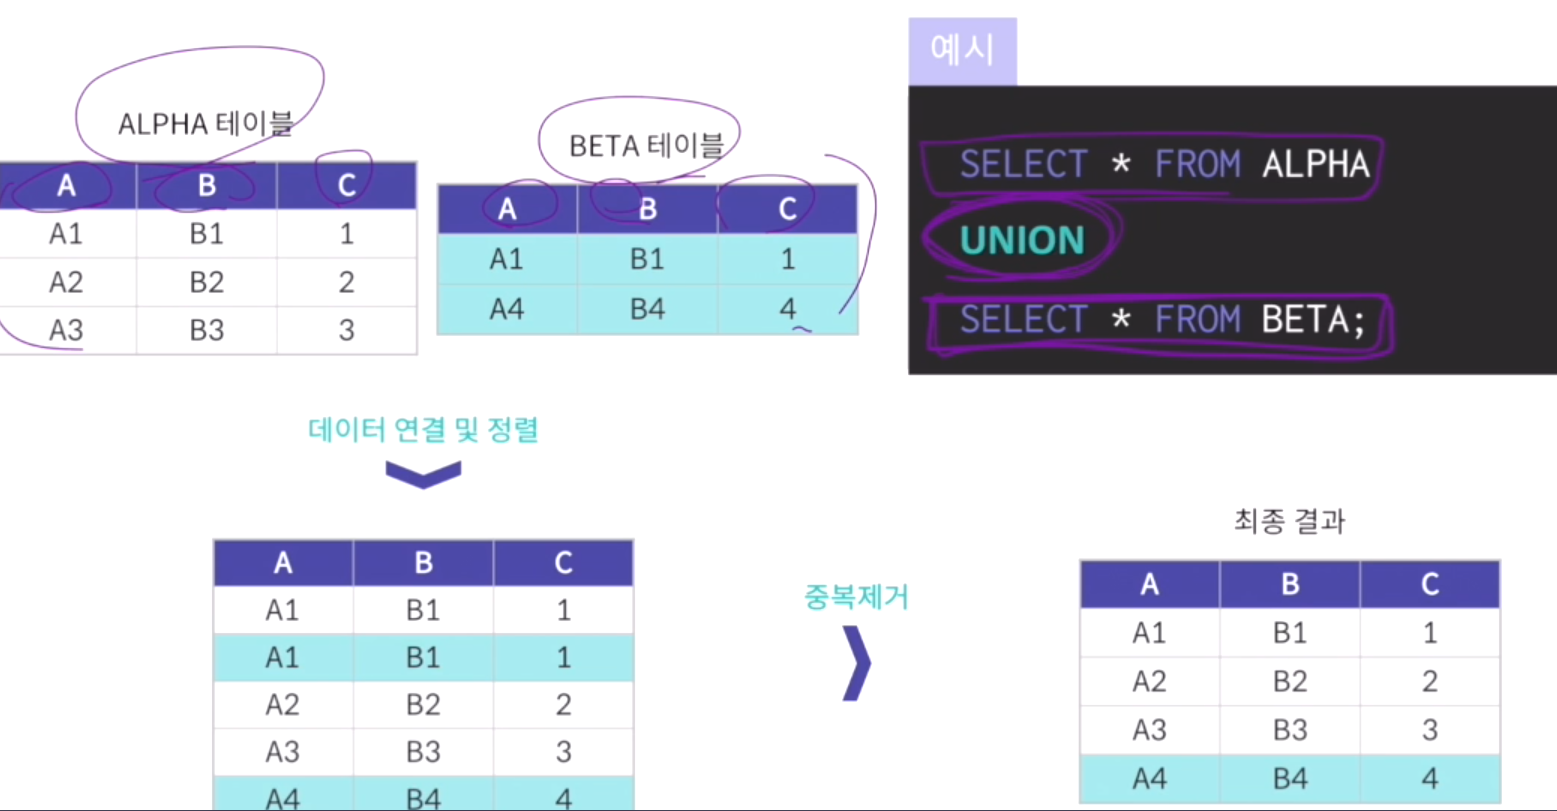

UNION ALL

UNION과 거의 같은 기능을 수행
다만, UNION과 달리 중복 제거와 정렬을 하지 않음

중복 제거를 하지 않는다는 것이
제일 중요한 차이점!

UNION ALL

- 관계형 대수의 일반 집합 연산에서 합집합의 역할 +) 정렬X, 중복제거 X

예시
SELECT * FROM ALPHA
UNION ALL
SELECT * FROM BETA;

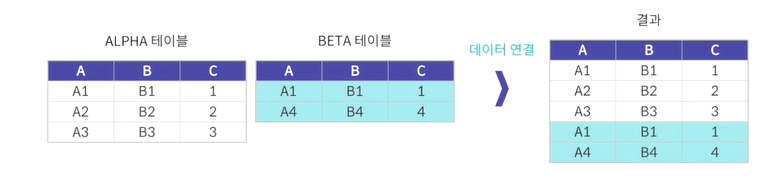

집합 연산자 개념 - UNION(1)
lecture_basic 테이블과 lecture_special 테이블에는 ID, 강의 이름, 학생 번호, 학생 이름 정보가 담겨 있습니다.

해당 테이블의 데이터를 통해 기본강의와 특별강의 상관없이 강의에 참여한 학생들의 학생 번호와 학생 이름을 조회하고 싶습니다.

이를 위해, 두 개의 테이블에서 각각 학생 번호(student_number) 와 학생 이름(student_name) 을 조회하는 2개의 SELECT 쿼리 결과를 조회해 봅시다.

이때 데이터의 중복이 없도록 처리해주는 집합 연산자를 이용합니다.



지시사항
lecture_basic테이블을 확인하고, SELECT문을 이용해 학생 번호(student_number) 와 학생 이름(student_name) 을 조회해 보세요.

lecture_special테이블을 확인하고, SELECT문을 이용해 학생 번호(student_number) 와 학생 이름(student_name) 을 조회해 보세요.

1번과 2번에서 조회된 결과에 대해서 집합 연산자 를 이용해 함께 조회하되, 데이터 정렬 및 중복제거 를 시행하는 집합연산자를 이용하세요.

Tips!
3번 결과에 대해 ORDER BY 를 이용하여 학생 번호를 기준으로 오름차순 정렬을 해주세요.
데이터 조회순서는 지시사항에서 언급하고 있는 순서대로 정확히 작성하세요.

In [ ]:
'''
-- 아래 쿼리는 lecture_basic, lecture_special 테이블의 구조를 나타냅니다. 해당 테이블을 수정할 필요는 없습니다.
DESC lecture_basic;
DESC lecture_special;

SELECT * FROM lecture_basic;
SELECT * FROM lecture_special;

-- 1. lecture_basic 테이블에서 학생번호(student_number)와 학생이름(student_name)을 조회하는 쿼리를 작성하세요.
SELECT student_number, student_name
FROM lecture_basic;
-- 2. lecture_special 테이블에서 학생번호(student_number)와 학생이름(student_name)을 조회하는 쿼리를 작성하세요.
SELECT student_number, student_name
FROM lecture_special;

-- 3. 위 2개의 쿼리에 대해서 집합 연산자를 이용하여 데이터 연결 및 정렬과 중복제거를 시행하는 쿼리를 작성하세요.
SELECT student_number, student_name
FROM lecture_basic
UNION 
SELECT student_number, student_name
FROM lecture_special
ORDER BY student_number ASC;

'''

'''
+----------------+-------------+------+-----+---------+-------+
| Field          | Type        | Null | Key | Default | Extra |
+----------------+-------------+------+-----+---------+-------+
| id             | int(11)     | NO   | PRI | NULL    |       |
| lecture_name   | varchar(50) | NO   |     | NULL    |       |
| student_number | int(11)     | NO   |     | NULL    |       |
| student_name   | varchar(30) | NO   |     | NULL    |       |
+----------------+-------------+------+-----+---------+-------+
+----------------+-------------+------+-----+---------+-------+
| Field          | Type        | Null | Key | Default | Extra |
+----------------+-------------+------+-----+---------+-------+
| id             | int(11)     | NO   | PRI | NULL    |       |
| lecture_name   | varchar(50) | NO   |     | NULL    |       |
| student_number | int(11)     | NO   |     | NULL    |       |
| student_name   | varchar(30) | NO   |     | NULL    |       |
+----------------+-------------+------+-----+---------+-------+
+----+--------------+----------------+--------------+
| id | lecture_name | student_number | student_name |
+----+--------------+----------------+--------------+
|  1 | math         |          10001 | HongGildong  |
|  2 | korean       |          10001 | HongGildong  |
|  3 | math         |          10003 | HongGilsun   |
|  4 | math         |          10004 | KimChulsoo   |
+----+--------------+----------------+--------------+
+----+--------------+----------------+--------------+
| id | lecture_name | student_number | student_name |
+----+--------------+----------------+--------------+
|  1 | piano        |          10001 | HongGildong  |
|  2 | kendo        |          10002 | KimAmugae    |
|  3 | piano        |          10003 | HongGilsun   |
|  4 | kendo        |          10003 | HongGilsun   |
+----+--------------+----------------+--------------+
+----------------+--------------+
| student_number | student_name |
+----------------+--------------+
|          10001 | HongGildong  |
|          10001 | HongGildong  |
|          10003 | HongGilsun   |
|          10004 | KimChulsoo   |
+----------------+--------------+
+----------------+--------------+
| student_number | student_name |
+----------------+--------------+
|          10001 | HongGildong  |
|          10002 | KimAmugae    |
|          10003 | HongGilsun   |
|          10003 | HongGilsun   |
+----------------+--------------+
+----------------+--------------+
| student_number | student_name |
+----------------+--------------+
|          10001 | HongGildong  |
|          10002 | KimAmugae    |
|          10003 | HongGilsun   |
|          10004 | KimChulsoo   |
+----------------+--------------+
'''

집합 연산자 개념 - UNION(2)
chicken_store라는 치킨 가게 테이블과 pizze_store라는 피자 가게 테이블에는 각 테이블에 구조에 맞도록 가게 이름과 이용 가능 여부(available) 정보가 담겨있습니다.

치킨 가게들과 피자 가게들 중에서 이용 가능한 모든 가게에 대해서 조회해보고자 합니다.

앞에서 학습한 집합 연산자를 이용하여 각 테이블에서 이용 가능한 가게를 모두 조회해보세요. 하지만 이때, 중복되는 데이터는 제거해서 출력해봅시다.



지시사항
chicken_store테이블을 확인하고, SELECT문을 이용해 가게 이름(store_name) 을 출력하되, WHERE 문을 이용하여 이용가능한(available = ‘Y’) 가게만 조회해보세요.

pizza_store테이블을 확인하고, SELECT문을 이용해 가게 이름(store_name) 을 출력하되, WHERE 문을 이용하여 이용가능한(available = ‘Y’) 가게만 조회해보세요.

1번과 2번에서 조회된 결과에 대해서 데이터를 연결해서 조회하되, 중복을 제거하여 확인할 수 있도록 적절한 집합 연산자를 사용해보세요.

Tips!
3번 결과에 대해 ORDER BY 를 이용하여 가게이름을 기준으로 오름차순 정렬을 해주세요.
데이터 조회순서는 지시사항에서 언급하고 있는 순서대로 정확히 작성하세요.

In [ ]:
'''
-- 아래 쿼리는 chicken_store, pizza_store 테이블의 구조를 나타냅니다. 해당 테이블을 수정할 필요는 없습니다.
DESC chicken_store;
DESC pizza_store;

SELECT * FROM chicken_store;
SELECT * FROM pizza_store;
-- 1. chicken_store에서 이용가능한 가게에 대해 가게이름만 출력하는 쿼리를 작성해보세요.
SELECT store_name
FROM chicken_store
WHERE available = 'Y';

-- 2. pizza_store에서 이용가능한 가게에 대해 가게이름만 출력하는 쿼리를 작성해보세요.
SELECT store_name
FROM pizza_store
WHERE available = 'Y';

-- 3. 위 2개의 쿼리에 대해서 집합 연산자를 이용하여 데이터 연결 및 정렬과 중복제거를 시행하는 쿼리를 작성하세요.
SELECT store_name
FROM chicken_store
WHERE available = 'Y'
UNION
SELECT store_name
FROM pizza_store
WHERE available = 'Y'
ORDER BY store_name ASC;

'''

'''
+------------+--------------+------+-----+---------+-------+
| Field      | Type         | Null | Key | Default | Extra |
+------------+--------------+------+-----+---------+-------+
| id         | int(11)      | NO   | PRI | NULL    |       |
| store_name | varchar(100) | NO   |     | NULL    |       |
| available  | varchar(1)   | NO   |     | NULL    |       |
+------------+--------------+------+-----+---------+-------+
+------------+--------------+------+-----+---------+-------+
| Field      | Type         | Null | Key | Default | Extra |
+------------+--------------+------+-----+---------+-------+
| id         | int(11)      | NO   | PRI | NULL    |       |
| store_name | varchar(100) | NO   |     | NULL    |       |
| available  | varchar(1)   | NO   |     | NULL    |       |
+------------+--------------+------+-----+---------+-------+
+----+--------------------------+-----------+
| id | store_name               | available |
+----+--------------------------+-----------+
|  1 | bbp                      | Y         |
|  2 | 노노치킨                  | N         |
|  3 | BHA                      | Y         |
|  4 | 치킨나라피자왕자            | Y         |
+----+--------------------------+-----------+
+----+--------------------------+-----------+
| id | store_name               | available |
+----+--------------------------+-----------+
|  1 | 피자킹                    | Y         |
|  2 | 한올림피자                 | Y         |
|  3 | 치킨나라피자왕자            | Y         |
|  4 | 도레미피자                 | Y         |
|  5 | 피자나루                   | N         |
+----+--------------------------+-----------+
+--------------------------+
| store_name               |
+--------------------------+
| bbp                      |
| BHA                      |
| 치킨나라피자왕자            |
+--------------------------+
+--------------------------+
| store_name               |
+--------------------------+
| 피자킹                    |
| 한올림피자                 |
| 치킨나라피자왕자            |
| 도레미피자                 |
+--------------------------+
+--------------------------+
| store_name               |
+--------------------------+
| bbp                      |
| BHA                      |
| 도레미피자                 |
| 치킨나라피자왕자            |
| 피자킹                    |
| 한올림피자                 |
+--------------------------+
'''

집합 연산자 개념 - UNION ALL
이번에는 각 강의 테이블에 어떤 강의들이 몇 번씩 신청되었는지 세어보려고 합니다. 따라서 기본강의 테이블과 특별강의 테이블에서 강의 이름만 조회하되, 숫자를 세기 위해 중복된 강의명도 그대로 조회해야 합니다.

두 개의 테이블에서 강의 이름(lecture_name) 에 대해서 조회하는 2개의 SELECT 쿼리의 결과를 함께 조회해 봅시다.
이때 데이터의 중복에 대해서 별도 처리를 하지 않는 집합 연산자 를 이용합니다.


지시사항
lecture_basic테이블을 확인하고, SELECT문을 이용해 강의 이름(lecture_name) 을 조회해 보세요.

lecture_special테이블을 확인하고, SELECT문을 이용해 강의 이름(lecture_name) 을 조회해 보세요.

1번과 2번에서 조회된 결과에 대해서 집합 연산자 를 이용해 함께 조회하되, 데이터 정렬 및 중복제거를 시행하지 않도록 하세요.

Tips!
3번 결과에 대해 ORDER BY 를 이용하여 강의 이름을 기준으로 오름차순 정렬을 해주세요.
데이터 조회순서는 지시사항에서 언급하고 있는 순서대로 정확히 작성하세요.

In [ ]:
'''
-- 아래 쿼리는 lecture_basic, lecture_special 테이블의 구조를 나타냅니다. 해당 테이블을 수정할 필요는 없습니다.
DESC lecture_basic;
DESC lecture_special;

SELECT * FROM lecture_basic;
SELECT * FROM lecture_special;
-- 1. lecture_basic 테이블에서 강의이름(lecture_name)을 조회하는 쿼리를 작성하세요.
SELECT lecture_name FROM lecture_basic;

-- 2. lecture_special 테이블에서 강의이름(lecture_name)을 조회하는 쿼리를 작성하세요.
SELECT lecture_name FROM lecture_special;


-- 3. 위 2개의 쿼리에 대해서 집합 연산자를 이용하여 데이터를 연결하되 데이터의 중복제거를 시행하지 않는 쿼리를 작성하세요.
SELECT lecture_name FROM lecture_basic
UNION ALL
SELECT lecture_name FROM lecture_special
ORDER BY lecture_name ASC;
'''

'''
+----------------+-------------+------+-----+---------+-------+
| Field          | Type        | Null | Key | Default | Extra |
+----------------+-------------+------+-----+---------+-------+
| id             | int(11)     | NO   | PRI | NULL    |       |
| lecture_name   | varchar(50) | NO   |     | NULL    |       |
| student_number | int(11)     | NO   |     | NULL    |       |
| student_name   | varchar(30) | NO   |     | NULL    |       |
+----------------+-------------+------+-----+---------+-------+
+----------------+-------------+------+-----+---------+-------+
| Field          | Type        | Null | Key | Default | Extra |
+----------------+-------------+------+-----+---------+-------+
| id             | int(11)     | NO   | PRI | NULL    |       |
| lecture_name   | varchar(50) | NO   |     | NULL    |       |
| student_number | int(11)     | NO   |     | NULL    |       |
| student_name   | varchar(30) | NO   |     | NULL    |       |
+----------------+-------------+------+-----+---------+-------+
+----+--------------+----------------+--------------+
| id | lecture_name | student_number | student_name |
+----+--------------+----------------+--------------+
|  1 | math         |          10001 | HongGildong  |
|  2 | korean       |          10001 | HongGildong  |
|  3 | math         |          10003 | HongGilsun   |
|  4 | math         |          10004 | KimChulsoo   |
+----+--------------+----------------+--------------+
+----+--------------+----------------+--------------+
| id | lecture_name | student_number | student_name |
+----+--------------+----------------+--------------+
|  1 | piano        |          10001 | HongGildong  |
|  2 | kendo        |          10002 | KimAmugae    |
|  3 | piano        |          10003 | HongGilsun   |
|  4 | kendo        |          10003 | HongGilsun   |
+----+--------------+----------------+--------------+
+--------------+
| lecture_name |
+--------------+
| math         |
| korean       |
| math         |
| math         |
+--------------+
+--------------+
| lecture_name |
+--------------+
| piano        |
| kendo        |
| piano        |
| kendo        |
+--------------+
+--------------+
| lecture_name |
+--------------+
| kendo        |
| kendo        |
| korean       |
| math         |
| math         |
| math         |
| piano        |
| piano        |
+--------------+
'''

집합 연산자 개념 - UNION/UNION ALL
request_past라는 신청(과거) 테이블과 request_new라는 신청(신규) 테이블에는 각 테이블에 구조에 맞도록 이름과 핸드폰 번호 정보가 공통으로 담겨 있습니다.

과거에 신청했던 이력과 신규로 신청했던 이력들에 대해 과거/신규를 구분하지 않고 이름과 핸드폰번호를 조회하려고 합니다.

두 개의 테이블에서 각각 이름(name) 과 핸드폰 번호(number) 를 조회하는 2개의 SELECT 쿼리 결과에 대해서 데이터를 연결하여 조회하되, 중복을 제거하지 않는 집합 연산자를 이용한 쿼리와 중복을 제거하는 집합 연산자를 이용한 쿼리를 만들어 봅시다.


지시사항
request_past테이블과 request_new 테이블에서 각각 이름(name) 과 번호(number) 를 조회하는 SELECT문에 대해서 중복을 제거하지 않는 집합 연산자를 이용하여 데이터를 연결해보세요.

request_past테이블과 request_new 테이블에서 각각 이름(name) 과 번호(number) 를 조회하는 SELECT문에 대해서 중복을 제거하는 집합 연산자를 이용하여 데이터를 연결해보세요.

Tips!
1, 2번 결과에 대해 ORDER BY 를 이용하여 이름을 기준으로 오름차순 정렬을 해주세요.
데이터 조회순서는 지시사항에서 언급하고 있는 순서대로 정확히 작성하세요.

In [ ]:
'''
-- 아래 쿼리는 request_past, request_new 테이블의 구조를 나타냅니다. 해당 테이블을 수정할 필요는 없습니다.
DESC request_past;
DESC request_new;

SELECT * FROM request_past;
SELECT * FROM request_new;

-- 1. 각 테이블에서 이름(name)과 번호(number)를 조회하고, 집합연산자를 통해 중복을 제거하지 않고 데이터를 연결해보세요.
SELECT name,number FROM request_past
UNION ALL
SELECT name,number FROM request_new
ORDER BY name;

-- 2. 각 테이블에서 이름(name)과 번호(number)를 조회하고, 집합연산자를 통해 중복을 제거하여 데이터를 연결해보세요.
SELECT name,number FROM request_past
UNION 
SELECT name,number FROM request_new
ORDER BY name;
'''

'''
+--------+--------------+------+-----+---------+-------+
| Field  | Type         | Null | Key | Default | Extra |
+--------+--------------+------+-----+---------+-------+
| id     | int(11)      | NO   | PRI | NULL    |       |
| name   | varchar(100) | NO   |     | NULL    |       |
| number | varchar(20)  | NO   |     | NULL    |       |
+--------+--------------+------+-----+---------+-------+
+--------+--------------+------+-----+---------+-------+
| Field  | Type         | Null | Key | Default | Extra |
+--------+--------------+------+-----+---------+-------+
| id     | int(11)      | NO   | PRI | NULL    |       |
| name   | varchar(100) | NO   |     | NULL    |       |
| number | varchar(20)  | NO   |     | NULL    |       |
| email  | varchar(100) | NO   |     | NULL    |       |
+--------+--------------+------+-----+---------+-------+
+----+--------------+------------+
| id | name         | number     |
+----+--------------+------------+
|  1 | 김원숭       | 1012345678 |
|  2 | 김호랑       | 1011112222 |
|  3 | 이기린       | 1098765432 |
|  4 | 권펭귄       | 1011116789 |
|  5 | 김강아지     | 1099998765 |
+----+--------------+------------+
+----+--------------+------------+------------------+
| id | name         | number     | email            |
+----+--------------+------------+------------------+
|  1 | 최호랑       | 1022221234 | ho@naver.com     |
|  2 | 이기린       | 1098765432 | girin@naver.com  |
|  3 | 김공룡       | 1033331234 | gong@naver.com   |
|  4 | 이토끼       | 1012345679 | rabbit@naver.com |
|  5 | 박수달       | 1012345555 | park@naver.com   |
|  6 | 김강아지     | 1099998765 | dog@naver.com    |
+----+--------------+------------+------------------+
+--------------+------------+
| name         | number     |
+--------------+------------+
| 권펭귄       | 1011116789 |
| 김강아지     | 1099998765 |
| 김강아지     | 1099998765 |
| 김공룡       | 1033331234 |
| 김원숭       | 1012345678 |
| 김호랑       | 1011112222 |
| 박수달       | 1012345555 |
| 이기린       | 1098765432 |
| 이기린       | 1098765432 |
| 이토끼       | 1012345679 |
| 최호랑       | 1022221234 |
+--------------+------------+
+--------------+------------+
| name         | number     |
+--------------+------------+
| 권펭귄       | 1011116789 |
| 김강아지     | 1099998765 |
| 김공룡       | 1033331234 |
| 김원숭       | 1012345678 |
| 김호랑       | 1011112222 |
| 박수달       | 1012345555 |
| 이기린       | 1098765432 |
| 이토끼       | 1012345679 |
| 최호랑       | 1022221234 |
+--------------+------------+
'''

[이론]집합 연산자 개념 - INTERSECT

INTERSECT

두 개의 테이블에 대해 겹치는 부분을 추출하는 연산
추출 후에는 중복된 결과를 제거

관계형 대수의 일반 집합 연산에서 교집합의 역할

INTERSECT

ALPHA테이블
A     B     C
A1    B1    1
A2    B2    2
A3    B4    4

BETA테이블
A     B     C
A1    B1    1
B1    B1    3

예시
SELECT A,B FROM AHPHA
INTERSECT
SELECT A,B FROM BETA;

겹치는 부분 추출
 A    B   
 A1   B1
-A1   B1
-A1   B1

중복제거

최종 결과
A    B
A1   B1

INTERSECT

Oracle/Maria(실습환경) Database에서는 지원되지만,
MySQL에서는 지원되지 않기 떄문에
추후 학습하는 JOIN 등을 활용해야 함.

집합 연산자 개념 - INTERSECT(1)
이번에는 기본강의와 특별강의를 모두 수강하는 학생들의 정보를 알아보고자 합니다.

두 개의 테이블에서 각각 학생 번호(student_number) 와 학생 이름(student_name) 을 조회하는 2개의 SELECT 쿼리 결과에 대해서 공통적으로 존재하는 데이터만 조회하는 쿼리를 집합 연산자 로 만들어 봅시다.

lecture_basic 테이블과 lecture_special 테이블의 구조는 서로 동일

지시사항
lecture_basic테이블을 확인하고, SELECT문을 이용해 학생 번호(student_number) 와 학생 이름(student_name) 을 조회해 보세요.

lecture_special테이블을 확인하고, SELECT문을 이용해 학생 번호(student_number) 와 학생 이름(student_name) 을 조회해 보세요.

1번과 2번에서 조회된 결과에 대해서 집합 연산자를 이용해 공통으로 존재하는 데이터를 조회하세요.

Tips!
3번 결과에 대해 ORDER BY 를 이용하여 학생번호를 기준으로 오름차순 정렬을 해주세요.
데이터 조회순서는 지시사항에서 언급하고 있는 순서대로 정확히 작성하세요.

In [ ]:
'''
-- 아래 쿼리는 lecture_basic, lecture_special 테이블의 구조를 나타냅니다. 해당 테이블을 수정할 필요는 없습니다.
DESC lecture_basic;
DESC lecture_special;
SELECT * FROM lecture_basic;
SELECT * FROM lecture_special;

-- 1. lecture_basic 테이블에서 학생번호(student_number)와 학생이름(student_name)을 조회하는 쿼리를 작성하세요.
SELECT student_number, student_name 
FROM lecture_basic;


-- 2. lecture_special 테이블에서 학생번호(student_number)와 학생이름(student_name)을 조회하는 쿼리를 작성하세요.
SELECT student_number, student_name 
FROM lecture_special;


-- 3. 위 2개의 쿼리에 대해서 집합 연산자를 이용하여 공통적으로 존재하는 데이터를 조회하는 쿼리를 작성해주세요.
SELECT student_number, student_name FROM lecture_basic
INTERSECT
SELECT student_number, student_name FROM lecture_special
ORDER BY student_number;




'''


'''
+----------------+-------------+------+-----+---------+-------+
| Field          | Type        | Null | Key | Default | Extra |
+----------------+-------------+------+-----+---------+-------+
| id             | int(11)     | NO   | PRI | NULL    |       |
| lecture_name   | varchar(50) | NO   |     | NULL    |       |
| student_number | int(11)     | NO   |     | NULL    |       |
| student_name   | varchar(30) | NO   |     | NULL    |       |
+----------------+-------------+------+-----+---------+-------+
+----------------+-------------+------+-----+---------+-------+
| Field          | Type        | Null | Key | Default | Extra |
+----------------+-------------+------+-----+---------+-------+
| id             | int(11)     | NO   | PRI | NULL    |       |
| lecture_name   | varchar(50) | NO   |     | NULL    |       |
| student_number | int(11)     | NO   |     | NULL    |       |
| student_name   | varchar(30) | NO   |     | NULL    |       |
+----------------+-------------+------+-----+---------+-------+
+----+--------------+----------------+--------------+
| id | lecture_name | student_number | student_name |
+----+--------------+----------------+--------------+
|  1 | math         |          10001 | HongGildong  |
|  2 | korean       |          10001 | HongGildong  |
|  3 | math         |          10003 | HongGilsun   |
|  4 | math         |          10004 | KimChulsoo   |
+----+--------------+----------------+--------------+
+----+--------------+----------------+--------------+
| id | lecture_name | student_number | student_name |
+----+--------------+----------------+--------------+
|  1 | piano        |          10001 | HongGildong  |
|  2 | kendo        |          10002 | KimAmugae    |
|  3 | piano        |          10003 | HongGilsun   |
|  4 | kendo        |          10003 | HongGilsun   |
+----+--------------+----------------+--------------+
+----------------+--------------+
| student_number | student_name |
+----------------+--------------+
|          10001 | HongGildong  |
|          10001 | HongGildong  |
|          10003 | HongGilsun   |
|          10004 | KimChulsoo   |
+----------------+--------------+
+----------------+--------------+
| student_number | student_name |
+----------------+--------------+
|          10001 | HongGildong  |
|          10002 | KimAmugae    |
|          10003 | HongGilsun   |
|          10003 | HongGilsun   |
+----------------+--------------+
+----------------+--------------+
| student_number | student_name |
+----------------+--------------+
|          10001 | HongGildong  |
|          10003 | HongGilsun   |
+----------------+--------------+
'''

이블에는 강의에 대한 신청 정보가 담겨 있습니다.

학생 테이블에서 관리하는 학생들 중에서는 특별강의를 신청한 사람도 있고 아닌 사람도 있습니다.
우리가 관리하고 있는 학생들 중에서 특별강의를 신청한 학생을 찾아봅시다.

두 개의 테이블에서 각각 이름(name) 과 이메일(email) 을 조회하는 2개의 SELECT 쿼리 결과에 대해서 공통으로 존재하는 데이터만 조회하는 쿼리를 집합 연산자 로 만들어 봅시다.


지시사항
student테이블을 확인하고, SELECT문을 이용해 이름(name) 과 이메일(email) 을 조회해 보세요.

lecture_special테이블을 확인하고, SELECT문을 이용해 이름(name) 와 이메일(email) 을 조회해 보세요.

1번과 2번에서 조회된 결과에 대해서 집합 연산자를 이용해 공통으로 존재하는 데이터를 조회하세요.

Tip!
데이터 조회순서는 지시사항에서 언급하고 있는 순서대로 정확히 작성하세요.

In [ ]:
'''
-- 아래 쿼리는 student, lecture_special 테이블의 구조를 나타냅니다. 해당 테이블을 수정할 필요는 없습니다.
DESC student;
DESC lecture_special;
SELECT * FROM student;
SELECT * FROM lecture_special;

-- 1. student 테이블에서 이름(name)와 이메일(email)을 조회하는 쿼리를 작성하세요.
SELECT name, email FROM student;


-- 2. lecture_special 테이블에서 이름(name)와 이메일(email)을 조회하는 쿼리를 작성하세요.
SELECT name, email FROM lecture_special;


-- 3. 위 2개의 쿼리에 대해서 집합 연산자를 이용하여 공통적으로 존재하는 데이터를 조회하는 쿼리를 작성해주세요.

SELECT name, email FROM student
INTERSECT
SELECT name, email FROM lecture_special
ORDER BY name ASC;

'''

'''
+----------------+--------------+------+-----+---------+-------+
| Field          | Type         | Null | Key | Default | Extra |
+----------------+--------------+------+-----+---------+-------+
| id             | int(11)      | NO   | PRI | NULL    |       |
| student_number | int(11)      | NO   |     | NULL    |       |
| name           | varchar(30)  | NO   |     | NULL    |       |
| grade          | int(11)      | NO   |     | NULL    |       |
| email          | varchar(100) | YES  |     | NULL    |       |
+----------------+--------------+------+-----+---------+-------+
+--------------+--------------+------+-----+---------+-------+
| Field        | Type         | Null | Key | Default | Extra |
+--------------+--------------+------+-----+---------+-------+
| id           | int(11)      | NO   | PRI | NULL    |       |
| lecture_name | varchar(50)  | NO   |     | NULL    |       |
| name         | varchar(30)  | NO   |     | NULL    |       |
| email        | varchar(100) | NO   |     | NULL    |       |
+--------------+--------------+------+-----+---------+-------+
+----+----------------+--------------+-------+--------------------+
| id | student_number | name         | grade | email              |
+----+----------------+--------------+-------+--------------------+
|  1 |          10001 | HongGildong  |     2 | hong@naver.com     |
|  2 |          10002 | KimAmoogae   |     3 | NULL               |
|  3 |          10003 | HongGilsun   |     1 | hong.sun@naver.com |
|  4 |          10004 | KimChulsoo   |     3 | NULL               |
|  5 |          10005 | LeeMooMyeong |     4 | NULL               |
+----+----------------+--------------+-------+--------------------+
+----+--------------+-------------+------------------+
| id | lecture_name | name        | email            |
+----+--------------+-------------+------------------+
|  1 | piano        | Kimseulki   | seulki@naver.com |
|  2 | kendo        | KimGuest    | guest@naver.com  |
|  3 | piano        | HongGildong | hong@naver.com   |
|  4 | kendo        | HongGilsun  | hsun@naver.com   |
+----+--------------+-------------+------------------+
+--------------+--------------------+
| name         | email              |
+--------------+--------------------+
| HongGildong  | hong@naver.com     |
| KimAmoogae   | NULL               |
| HongGilsun   | hong.sun@naver.com |
| KimChulsoo   | NULL               |
| LeeMooMyeong | NULL               |
+--------------+--------------------+
+-------------+------------------+
| name        | email            |
+-------------+------------------+
| Kimseulki   | seulki@naver.com |
| KimGuest    | guest@naver.com  |
| HongGildong | hong@naver.com   |
| HongGilsun  | hsun@naver.com   |
+-------------+------------------+
+-------------+----------------+
| name        | email          |
+-------------+----------------+
| HongGildong | hong@naver.com |
+-------------+----------------+
'''

[이론]집합 연산자 개념 - EXCEPT

EXCEPT(MINUS)

두 개의 테이블에서 겹치는 부분을
앞의 테이블에서 제외하여 추출하는 연산
추출 후에는 중복된 결과를 제거

관계형 대수의 일반 집합 연산에서 차집합의 역할

EXCEPT(MINUS)

ALPHA테이블
A     B     C
A1    B1    1
A2    B3    2
A2    B3    4

BETA테이블
A     B     C
A1    B1    1
A1    B3    4

예시
SELECT A,B FROM ALPHA
EXCEPT
SELECT A,B FROM BETA;

겹치는 부분 제외
  A    B
  A2   B3
- A2   B3

중복 제거

최종 결과
A   B
A2  B3

EXCEPT(MINUS)

OracleDatabase에서는 지원되지만,
실습 환경인 Maria DataBase에서는 10.3 version부터
EXCEPT 키워드로 지원함.

MySQL에서는 지원되지 않기 때문에
추후 학습하는 JOIN등을 활용해야 함.

집합 연산자 개념 - EXCEPT(1)
이번에는 특별강의는 수강하지만, 기본강의는 수강하지 않는 학생들의 정보를 조회해보려고 합니다.

두 개의 테이블에서 각각 학생 번호(student_number) 와 학생 이름(student_name) 을 조회하는 2개의 SELECT 쿼리 결과에 대해서, 집합 연산자 를 이용하여 lecture_special 테이블에는 존재하지만, lecture_basic 테이블에는 존재하지 않는 학생 번호(student_number) 와 학생 이름(student_name) 을 조회하는 쿼리를 작성해봅시다.

lecture_basic 테이블과 lecture_special 테이블의 구조는 서로 동일

지시사항
lecture_basic테이블을 확인하고, SELECT문을 이용해 학생 번호(student_number) 와 학생 이름(student_name) 을 조회해 보세요.

lecture_special테이블을 확인하고, SELECT문을 이용해 학생 번호(student_number) 와 학생 이름(student_name) 을 조회해 보세요.

1번과 2번에서 조회된 결과에 대해서 집합 연산자를 이용해 lecture_special 테이블에는 존재하지만, lecture_basic 테이블에는 존재하지 않는 데이터를 조회하세요.

Tips!
3번 결과에 대해 ORDER BY 를 이용하여 학생 번호를 기준으로 오름차순 정렬을 해주세요.
데이터 조회순서는 지시사항에서 언급하고 있는 순서대로 정확히 작성하세요.

In [ ]:
'''
-- 아래 쿼리는 lecture_basic, lecture_special 테이블의 구조를 나타냅니다. 해당 테이블을 수정할 필요는 없습니다.
DESC lecture_basic;
DESC lecture_special;

SELECT * FROM lecture_basic;
SELECT * FROM lecture_special;

-- 1. lecture_basic 테이블에서 학생번호(student_number)와 학생이름(student_name)을 조회하는 쿼리를 작성하세요.
SELECT student_number, student_name FROM lecture_basic;


-- 2. lecture_special 테이블에서 학생번호(student_number)와 학생이름(student_name)을 조회하는 쿼리를 작성하세요.
SELECT student_number, student_name FROM lecture_special;


-- 3. 위 2개의 쿼리에 대해서 집합 연산자를 이용하여 lecture_special 테이블에는 존재하지만, lecture_basic에는 
-- 존재하지 않는 학생번호와 학생이름을 조회하는 쿼리를 작성하세요.

SELECT student_number, student_name FROM lecture_basic
EXCEPT
SELECT student_number, student_name FROM lecture_special
ORDER BY student_number ASC;

'''

'''
+----------------+-------------+------+-----+---------+-------+
| Field          | Type        | Null | Key | Default | Extra |
+----------------+-------------+------+-----+---------+-------+
| id             | int(11)     | NO   | PRI | NULL    |       |
| lecture_name   | varchar(50) | NO   |     | NULL    |       |
| student_number | int(11)     | NO   |     | NULL    |       |
| student_name   | varchar(30) | NO   |     | NULL    |       |
+----------------+-------------+------+-----+---------+-------+
+----------------+-------------+------+-----+---------+-------+
| Field          | Type        | Null | Key | Default | Extra |
+----------------+-------------+------+-----+---------+-------+
| id             | int(11)     | NO   | PRI | NULL    |       |
| lecture_name   | varchar(50) | NO   |     | NULL    |       |
| student_number | int(11)     | NO   |     | NULL    |       |
| student_name   | varchar(30) | NO   |     | NULL    |       |
+----------------+-------------+------+-----+---------+-------+
+----+--------------+----------------+--------------+
| id | lecture_name | student_number | student_name |
+----+--------------+----------------+--------------+
|  1 | math         |          10001 | HongGildong  |
|  2 | korean       |          10001 | HongGildong  |
|  3 | math         |          10003 | HongGilsun   |
|  4 | math         |          10004 | KimChulsoo   |
+----+--------------+----------------+--------------+
+----+--------------+----------------+--------------+
| id | lecture_name | student_number | student_name |
+----+--------------+----------------+--------------+
|  1 | piano        |          10001 | HongGildong  |
|  2 | kendo        |          10002 | KimAmugae    |
|  3 | piano        |          10003 | HongGilsun   |
|  4 | kendo        |          10003 | HongGilsun   |
+----+--------------+----------------+--------------+
+----------------+--------------+
| student_number | student_name |
+----------------+--------------+
|          10001 | HongGildong  |
|          10001 | HongGildong  |
|          10003 | HongGilsun   |
|          10004 | KimChulsoo   |
+----------------+--------------+
+----------------+--------------+
| student_number | student_name |
+----------------+--------------+
|          10001 | HongGildong  |
|          10002 | KimAmugae    |
|          10003 | HongGilsun   |
|          10003 | HongGilsun   |
+----------------+--------------+
+----------------+--------------+
| student_number | student_name |
+----------------+--------------+
|          10004 | KimChulsoo   |
+----------------+--------------+
'''

집합 연산자 개념 - EXCEPT(2)
book_store_a라는 a 책방 테이블과 book_store_b라는 b 책방 테이블에는 각 테이블에 구조에 맞도록 책의 이름과 재고 등의 정보가 담겨있습니다.

각 책방에서 재고가 존재하지만, 그 중에서도 a 책방에만 존재하는 책을 찾아보려고 합니다.

두 개의 테이블에서 재고가 존재하는 (stock>0) 책에 대해서, book_store_a에만 존재하는 책의 이름(book_name) 을 집합 연산자로 출력해봅시다.


지시사항
book_store_a테이블을 확인하고, SELECT문과 WHERE문을 이용해 재고(stock)가 0 초과인 데이터에 대해서 책의 이름(book_name) 을 조회해 보세요.

book_store_b테이블을 확인하고, SELECT문과 WHERE문을 이용해 재고(stock)가 0 초과인 데이터에 대해서 책의 이름(book_name) 을 조회해 보세요.

1번과 2번에서 조회된 결과에 대해서 적절한 집합 연산자를 이용해 book_store_a 테이블에만 존재하는 책의 정보를 조회하세요.

In [ ]:
'''
-- 아래 쿼리는 book_store_a, book_store_b 테이블의 구조를 나타냅니다. 해당 테이블을 수정할 필요는 없습니다.
DESC book_store_a;
DESC book_store_b;

SELECT * FROM book_store_a;
SELECT * FROM book_store_b;

-- 1. book_store_a 테이블에서 재고(stock)가 0 초과인 데이터의 책의이름(book_name)을 조회하는 쿼리를 작성하세요.
SELECT book_name 
FROM book_store_a
WHERE stock > 0;


-- 2. book_store_b 테이블에서 재고(stock)가 0 초과인 데이터의 책의이름(book_name)을 조회하는 쿼리를 작성하세요.
SELECT book_name 
FROM book_store_b
WHERE stock > 0;

-- 3. 위 2개의 쿼리에 대해서 집합 연산자를 이용하여 book_store_a에만 존재하는 데이터를 조회하세요.
SELECT book_name 
FROM book_store_a
WHERE stock > 0
EXCEPT
SELECT book_name 
FROM book_store_b
WHERE stock > 0
ORDER BY book_name ASC;

'''

'''
+-----------+--------------+------+-----+---------+-------+
| Field     | Type         | Null | Key | Default | Extra |
+-----------+--------------+------+-----+---------+-------+
| id        | int(11)      | NO   | PRI | NULL    |       |
| book_name | varchar(100) | NO   |     | NULL    |       |
| stock     | int(11)      | NO   |     | NULL    |       |
| writer    | varchar(30)  | NO   |     | NULL    |       |
+-----------+--------------+------+-----+---------+-------+
+-----------+--------------+------+-----+---------+-------+
| Field     | Type         | Null | Key | Default | Extra |
+-----------+--------------+------+-----+---------+-------+
| id        | int(11)      | NO   | PRI | NULL    |       |
| book_name | varchar(100) | NO   |     | NULL    |       |
| stock     | int(11)      | NO   |     | NULL    |       |
+-----------+--------------+------+-----+---------+-------+
+----+--------------------+-------+-----------+
| id | book_name          | stock | writer    |
+----+--------------------+-------+-----------+
|  1 | 좋은시집           |     0 | 홍길동    |
|  2 | SQL특집            |     3 | 홍길동    |
|  3 | 정보처리기사       |     1 | 홍길순    |
|  4 | 수학               |     2 | 김철수    |
+----+--------------------+-------+-----------+
+----+--------------------------+-------+
| id | book_name                | stock |
+----+--------------------------+-------+
|  1 | SQL특집                  |     0 |
|  2 | 수학                     |     5 |
|  3 | 정보처리기사             |     2 |
|  4 | 정보처리산업기사         |     2 |
|  5 | 글쓰는개발자             |     1 |
+----+--------------------------+-------+
+--------------------+
| book_name          |
+--------------------+
| SQL특집            |
| 정보처리기사       |
| 수학               |
+--------------------+
+--------------------------+
| book_name                |
+--------------------------+
| 수학                     |
| 정보처리기사             |
| 정보처리산업기사         |
| 글쓰는개발자             |
+--------------------------+
+-----------+
| book_name |
+-----------+
| SQL특집   |
+-----------+
'''

[이론]계층형 질의 - Oracle

계층형 질의란?

테이블에 계층형 데이터가 존재하는 경우
데이터를 조회하기 위해 사용하는 것


대표적인 데이터베이스

ORACLE       SQL Server

계층형 데이터

동일 테이블에 계층적으로 상위와 하위 데이터가
포함되어 있는 데이터

순환관계 데이터 모델 
관리자 ↔ 사원

↓

계층형 구조
      A
B          C
         D    E
  
↓ 
  
샘플 데이터
사원   관리자
A
B      A
C      A
D      C
E      C

계층형 질의 예시(Oracle)

Expression

SELECT LEVEL, 자식 컬럼, 부모 컬럼, 원하는 컬럼

FROM 테이블명

START WITH 부모컬럼 IS NULL
    - 부모 컬럼이 NULL인 행이 ROOT(가장 상위)가 됨
CONNECT BY PRIOR 자식컬럼 = 부모컬럼 ;
    - 상위 데이터와 하위 데이터의 연결 방식

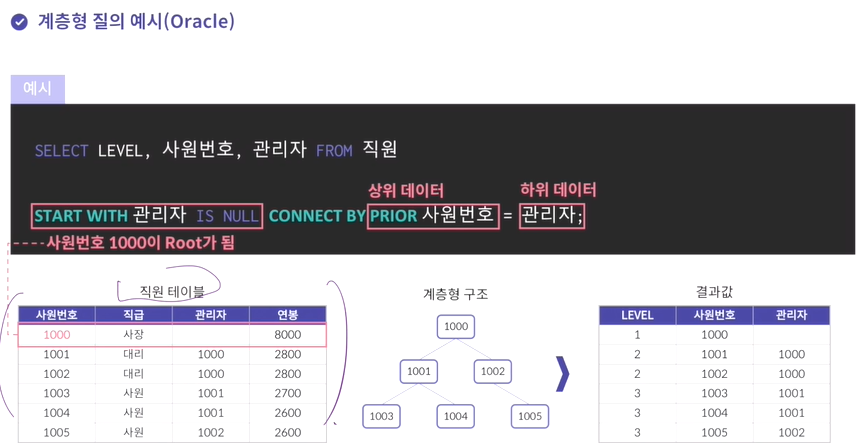

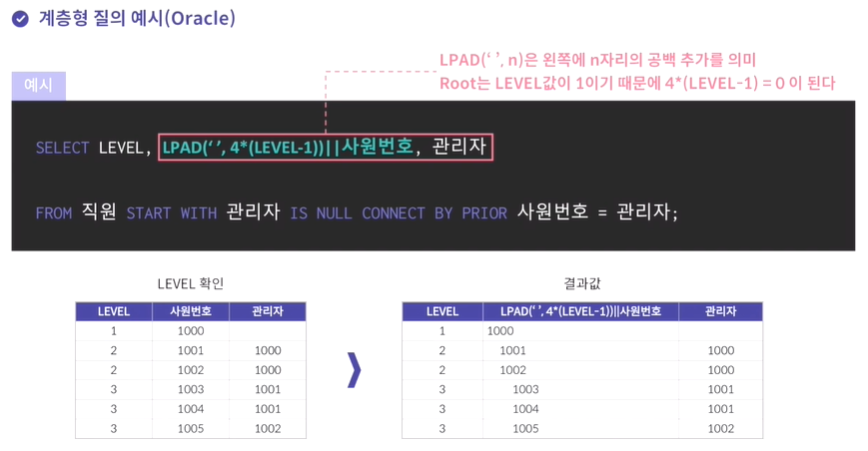

CONNECT BY 키워드(Oracle)

키워드                
LEVEL
    - 검색 항목의 깊이를 의미하며, 계층구조에서 루트(최상위)의 레벨이 1

CONNECT_BY_ROOT
    - 현재 전개할 데이터의 루트(최상위) 데이터 값 표시
    
CONNECT_BY_ISLEAF
    - 현재 전개할 데이터가 리프(최하위) 데이터 인지에 대한 값 표시(0or1)
    
SYS_CONNECT_BY_PATH(A,B)
    - 루트 데이터부터 현재까지 전개한 경로 표시(A:컬럼명,B:구분자)

[이론]계층형 질의 - SQL Server / MariaDB

계층형 질의 예시(SQL Server)

SQL Server version.2000 이전
-> 저장 프로시저를 재귀 호출 / While 루프 문에서 임시 테이블 사용

SQL Server version.2005 이후
-> CTE(Common Table Expression)을 이용하여 재귀 호출

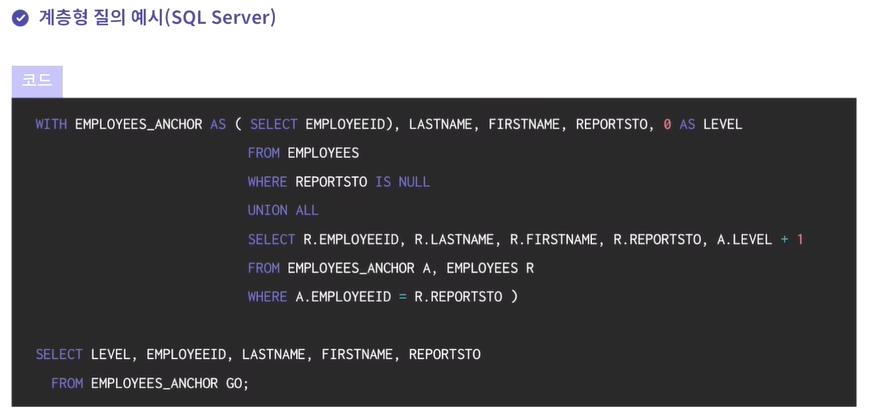

계층형 질의 예시(MySQL / MariaDB)

특정 버전 이후 (Maria DB의 경우 10.2 이후)
CTE(Common Table Expression)을 이용하여 재귀 호출

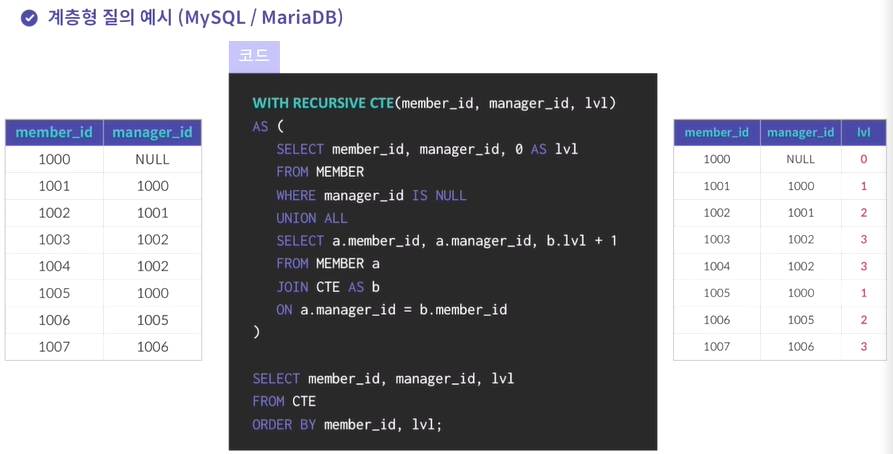

WITH RECURSIVE CTE 컬럼명 
 재귀 호출 하겠다.

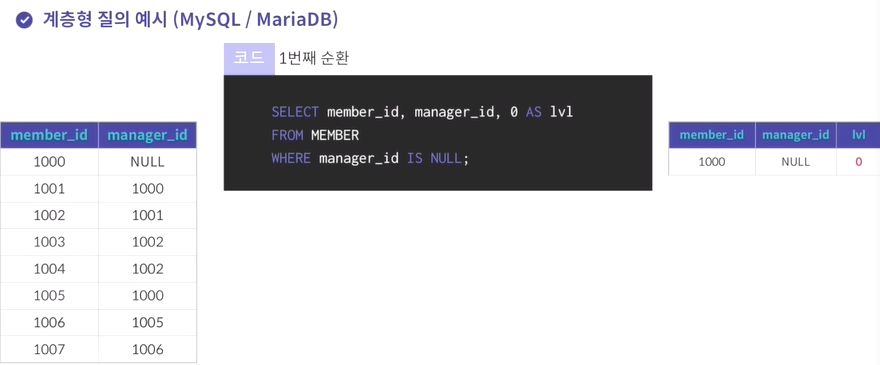

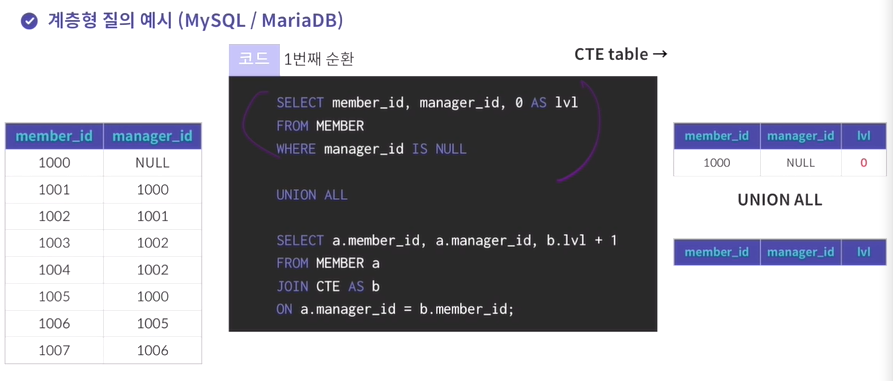





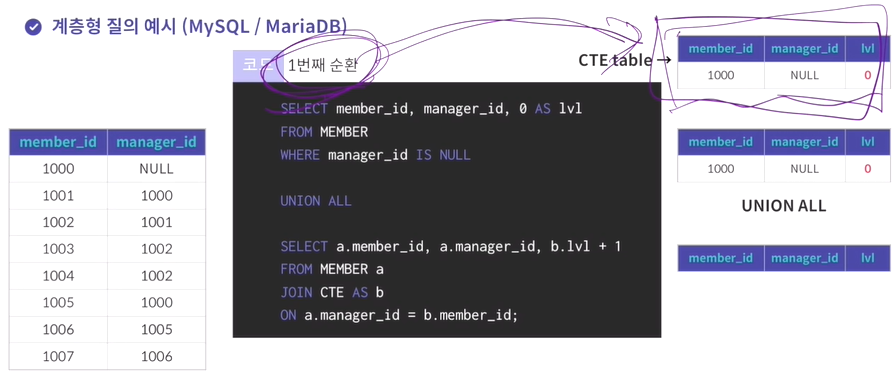

 처음부터 다시 볼것 21/25